In [ ]:


#Importing pre-requisite libaries
import os
import re
import nltk
import glob
import tqdm
import pickle
import random
import string
import inflect
import operator
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import tokenize
from nltk import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from prettytable import PrettyTable
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

import itertools
colors = itertools.cycle(["r", "b", "g"])

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IR ASSIGNMENT 2/BBC News Train.csv',encoding='latin-1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(1490, 3)

In [ ]:
df.head(5)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    text= text.replace(',','')
    text = text.replace('\'s','')
    return text
df['Text'] = df['Text'].apply(cleanText)

In [ ]:
df.head(10)

,ArticleId,Text,Category
0,1833,worldcom e-boss launches defence lawyers defen...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [ ]:
len(df)

1490

In [ ]:
tempdf=df['Text']

In [ ]:
tempdf=tempdf.apply(word_tokenize)

In [ ]:
tempdf.head()

df['Text']=tempdf

In [ ]:
df.head()

,ArticleId,Text,Category
0,1833,"[worldcom, e-boss, launches, defence, lawyers,...",business
1,154,"[german, business, confidence, slides, german,...",business
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech
4,917,"[enron, bosses, in, $, 168m, payout, eighteen,...",business


In [ ]:
tempdf=df['Text']

In [ ]:
tempdf

0       [worldcom, e-boss, launches, defence, lawyers,...
1       [german, business, confidence, slides, german,...
2       [bbc, poll, indicates, economic, gloom, citize...
3       [lifestyle, governs, mobile, choice, faster, b...
4       [enron, bosses, in, $, 168m, payout, eighteen,...
                              ...                        
1485    [double, eviction, from, big, brother, model, ...
1486    [dj, double, act, revamp, chart, show, dj, duo...
1487    [weak, dollar, hits, reuters, revenues, at, me...
1488    [apple, ipod, family, epands, market, apple, h...
1489    [santy, worm, makes, unwelcome, visit, thousan...
Name: Text, Length: 1490, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
stopli = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tempdf=tempdf.apply(lambda x: [item for item in x if item not in stopli])

In [ ]:
df['Text']=tempdf

In [ ]:
df.head()

,ArticleId,Text,Category
0,1833,"[worldcom, e-boss, launches, defence, lawyers,...",business
1,154,"[german, business, confidence, slides, german,...",business
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech
4,917,"[enron, bosses, $, 168m, payout, eighteen, for...",business


In [ ]:
text=df.Text
df.drop('Text', axis=1)

,ArticleId,Category
0,1833,business
1,154,business
2,1101,business
3,1976,tech
4,917,business
...,...,...
1485,857,entertainment
1486,325,entertainment
1487,1590,business
1488,1587,tech


In [ ]:
df['Text']=text

In [ ]:
df.head()

,ArticleId,Text,Category
0,1833,"[worldcom, e-boss, launches, defence, lawyers,...",business
1,154,"[german, business, confidence, slides, german,...",business
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech
4,917,"[enron, bosses, $, 168m, payout, eighteen, for...",business


In [ ]:
#stemming
tempdf=df['Text']


In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")


In [ ]:
tempdf = tempdf.apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
df['Text']=tempdf

In [ ]:
df=df.rename(columns={'Text':0, 'Sentiment':1})

In [ ]:
df.head()

,ArticleId,0,Category
0,1833,"[worldcom, e-boss, launch, defenc, lawyer, def...",business
1,154,"[german, busi, confid, slide, german, busi, co...",business
2,1101,"[bbc, poll, indic, econom, gloom, citizen, maj...",business
3,1976,"[lifestyl, govern, mobil, choic, faster, bette...",tech
4,917,"[enron, boss, $, 168m, payout, eighteen, forme...",business


In [ ]:
df=df.drop('ArticleId', axis=1)

In [ ]:
df=df.rename(columns={'0':0, 'Category':1})

In [ ]:
df

,0,1
0,"[worldcom, e-boss, launch, defenc, lawyer, def...",business
1,"[german, busi, confid, slide, german, busi, co...",business
2,"[bbc, poll, indic, econom, gloom, citizen, maj...",business
3,"[lifestyl, govern, mobil, choic, faster, bette...",tech
4,"[enron, boss, $, 168m, payout, eighteen, forme...",business
...,...,...
1485,"[doubl, evict, big, brother, model, capric, ho...",entertainment
1486,"[dj, doubl, act, revamp, chart, show, dj, duo,...",entertainment
1487,"[weak, dollar, hit, reuter, revenu, media, gro...",business
1488,"[appl, ipod, famili, epand, market, appl, epan...",tech


In [ ]:
#Creating file classes list
fileClassesList = ['tech','business','sport','entertainment','politics']

In [ ]:

#Split of dataset on random manner depends on ratios used
def randomSplitFunction(dataFiles,ratioUsed):
    randomBooleanUsed = np.random.rand(len(dataFiles)) < ratioUsed
    trainFiles = dataFiles[randomBooleanUsed]
    testFiles = dataFiles[~randomBooleanUsed]
    return trainFiles,testFiles

In [ ]:
#Creating function to reseting the index
def resetIndexFunction(trainDataFiles,testDataFiles):
    trainFinal = trainDataFiles.reset_index(drop=True)
    testFinal = testDataFiles.reset_index(drop=True)
    splittedTrainClass = Counter(trainFinal[1])
    print("Count in Classes: "+str(splittedTrainClass))
    print()
    return trainFinal,testFinal,splittedTrainClass

In [ ]:
#Creating function to count the number of UNIQUE words in a specific class
def countUniqueWords(wordDictionary):
    uniqueWords = set()
    for iterator in wordDictionary:
        uniqueWords = uniqueWords | set(wordDictionary[iterator])
    uniqueWordsList = len(uniqueWords)
    return uniqueWords,uniqueWordsList

In [ ]:
#class frequency for each word
def findCF(wordDictionary):
    CFValues = {}
    for iterator in wordDictionary:
        for w in set(wordDictionary[iterator]):
            CFValues[w] = []
    for iterator in wordDictionary:
        for w in set(wordDictionary[iterator]):
            if iterator == 'tech':
                CFValues[w].append(iterator)
            elif iterator == 'business':
                CFValues[w].append(iterator)       
            elif iterator == 'sport':
                CFValues[w].append(iterator)
            elif iterator == 'entertainment':
                CFValues[w].append(iterator)
            else:
                CFValues[w].append(iterator)
    for x,y in CFValues.items():
        CFValues[x] = len(y)
    return CFValues
     

In [ ]:

#Creating function to evaluate class frequency
def classDFrequencyEvaluation(w,CFValues):
    rand = 0
    try:
        rand = CFValues[w]
    except:
        pass
    return rand

In [ ]:


#Creating function to count the number of words in specific class
def countWordsInClass(trainDataFiles):
    wordDictionary= {}
    for iterator in range(0,len(trainDataFiles)):
        try:
            wordDictionary[trainDataFiles[1][iterator]] = wordDictionary[trainDataFiles[1][iterator]] + trainDataFiles[0][iterator]
        except:
            wordDictionary[trainDataFiles[1][iterator]] = trainDataFiles[0][iterator]
    return wordDictionary

In [ ]:

#Creating function to TF-ICF value
def tfIcfEvaluation(wordDictionary,CF):
    tfIcfValues = {}
    N=5
    for iterator in wordDictionary:
        tempDictonary={}
        count=Counter(wordDictionary[iterator])
        wordCount=len(wordDictionary[iterator])
        for word in set(wordDictionary[iterator]):
            termFrequency = count[word]/wordCount
            classFrequency = classDFrequencyEvaluation(word,CF)
            inverseClassFrequency = np.log((N)/(classFrequency))
            tempDictonary[word] = termFrequency*inverseClassFrequency
        tfIcfValues[iterator] = tempDictonary
    return tfIcfValues

In [ ]:

#Creating function that will find top K-Features by using TF-ICF value
def kFeatureUsingTfIcf(TF_ICF,featureValue):
    finalFeaturesList=[]
    kFeaturesList={}
    for iterator in TF_ICF.keys():
        tempFeatures=[]
        sortedK = sorted(TF_ICF[iterator], key=TF_ICF[iterator].get, reverse=True)
        for iteratorTwo in sortedK[0:int(featureValue)]:
            finalFeaturesList.append(iteratorTwo)
            tempFeatures.append(iteratorTwo)
        kFeaturesList[iterator] = tempFeatures
    return kFeaturesList,finalFeaturesList

In [ ]:

#Creating function to evaluate class frequences
def countFrequencies(classList,TF_icfFeatures,kFeatures):
    classOne = {}
    classTwo = {}
    for i in classList:
        countTopKFeatures = Counter(kFeatures[i])
        for j in TF_icfFeatures:
            classOne[i, j] = countTopKFeatures[j]
            try:
                classTwo[i] = classTwo[i] + countTopKFeatures[j]
            except:
                classTwo[i] = countTopKFeatures[j]
    return classOne,classTwo

In [ ]:

def frequency(w, l,classOne,classTwo):
    try:
        return classOne[l, w],classTwo[l]
    except:
        return 0, classTwo[l]

In [ ]:
#Creating function for Naive-Bayes algorithm driver code
def nbAlgoFunction(disctintWordsC,classTrainSplit,trainData,testData,allClasses,classOne,classTwo):
    truthValues = []
    predictedValues = []
    for iterator in range(testData.shape[0]):
        truthValues.append(testData[1][iterator])
        classWordProbability = []
        for l in allClasses:
            wordProbability = 0
            for w in testData[0][iterator]:
                freq, count = frequency(w, l,classOne,classTwo)
                pp = (freq + 1) / (count + disctintWordsC)
                wordProbability += np.log(pp)
            wordProbability += np.log(classTrainSplit[l] / trainData.shape[0])            
            classWordProbability.append(wordProbability)           
        predictedValues.append(allClasses[np.argmax(classWordProbability)])        
    return truthValues,predictedValues

In [ ]:

#Creating function for evaluating accuracy
def aacuracyEvaluation(predValues, truthValues):
    valueOne = len([1 for i in range(len(predValues)) if predValues[i]==truthValues[i]])
    return valueOne/len(predValues)

In [ ]:
#Creating function for evaluating confusion matrix
def evaluateConfusionMatrix(predValues, truthValues,classes):
    cMatrix = np.zeros((len(classes), len(classes))).astype(int)
    for i in range(len(predValues)):
        cMatrix[classes.index(predValues[i])][classes.index(truthValues[i])] += 1
    return cMatrix

In [ ]:


#Creating function for evaluating heatmap
def heatmap(conf_mat):
    sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')

**Driver Code**

In [ ]:

#Creating Driver function
def helperFunction(dataFiles,ratio):
    trainDataFiles,testData = randomSplitFunction(dataFiles,ratio)
    trainDataFiles,testData,train_class_split = resetIndexFunction(trainDataFiles,testData)
    wordDictionary = countWordsInClass(testData)
    distinct_words,distinct_words_c = countUniqueWords(wordDictionary)
    CFValues = findCF(wordDictionary)
    valueTFICF = tfIcfEvaluation(wordDictionary,CFValues)
    valuesFeature = [10,20,40,50,60,70]
    for fValue in valuesFeature:
        k_feature,featTFICF = kFeatureUsingTfIcf(valueTFICF,fValue)
        class_f,class_c = countFrequencies(fileClassesList,featTFICF,k_feature)
        truthValues,predictedValues = nbAlgoFunction(distinct_words_c,train_class_split,trainDataFiles,testData,fileClassesList,class_f,class_c)
        accuracyEvaluated = aacuracyEvaluation(predictedValues,truthValues)
        print("Training data size: "+str(ratio*100)+" %")
        print("Feature Selected: "+str(fValue))
        print("Accuracy Achieved: "+str("{:.2f}".format(accuracyEvaluated*100))+" %")
        confusionMatrixEvaluated = evaluateConfusionMatrix(predictedValues,truthValues,fileClassesList)
        print("Confusion Matrix: ")
        print(confusionMatrixEvaluated)
        print()
        featureList.append(fValue)
        listPref.append(accuracyEvaluated)
        listTrainSize.append(ratio)

In [ ]:

#Defining features, train dataset and ratio/proportion list
featureList = []
listPref = []
listTrainSize = []
proportionUsed = [0.7,0.6,0.8,0.5]
s=1
for currentRatio in proportionUsed:
    print("Case "+str(s))
    helperFunction(df,currentRatio)
    print("----------------------------------")
    print("----------------------------------")
    print()
    s+=1

Case 1
Count in Classes: Counter({'sport': 240, 'business': 221, 'entertainment': 189, 'tech': 187, 'politics': 184})

Training data size: 70.0 %
Feature Selected: 10
Accuracy Achieved: 81.88 %
Confusion Matrix: 
[[ 62   6   0   0   2]
 [  1  75   0   0   5]
 [  2  30 106   5  19]
 [  9   1   0  79   2]
 [  0   3   0   0  62]]

Training data size: 70.0 %
Feature Selected: 20
Accuracy Achieved: 91.04 %
Confusion Matrix: 
[[ 69   7   0   2   2]
 [  0  97   0   0   2]
 [  0   9 105   4   7]
 [  4   0   0  78   1]
 [  1   2   1   0  78]]

Training data size: 70.0 %
Feature Selected: 40
Accuracy Achieved: 94.46 %
Confusion Matrix: 
[[ 67   4   0   0   1]
 [  1 104   0   0   1]
 [  0   4 105   2   3]
 [  4   0   1  82   0]
 [  2   3   0   0  85]]

Training data size: 70.0 %
Feature Selected: 50
Accuracy Achieved: 95.52 %
Confusion Matrix: 
[[ 68   4   0   0   1]
 [  1 107   0   0   1]
 [  0   3 105   2   2]
 [  3   0   1  82   0]
 [  2   1   0   0  86]]

Training data size: 70.0 %
Feature Se

In [ ]:
class color:
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'
     

In [ ]:
myTable = PrettyTable()
myTable.field_names = [color.BOLD+"Training Data Proportion"+color.END,color.BOLD+ "Features Selected/Class (On basis of TF-ICF) "+color.END,color.BOLD+"Accuracy Achieved"+color.END]
for i in range(len(listTrainSize)):
    myTable.add_row([color.BOLD+str(round(listTrainSize[i]*100))+" %"+color.END,color.BLUE+color.BOLD+str(round(featureList[i]))+color.END,color.DARKCYAN+color.BLUE+str("{:.2f}".format(listPref[i]*100))+" %"+color.END])
print(myTable)

+--------------------------+-----------------------------------------------+-------------------+
| Training Data Proportion | Features Selected/Class (On basis of TF-ICF)  | Accuracy Achieved |
+--------------------------+-----------------------------------------------+-------------------+
|           70 %           |                       10                      |      81.88 %      |
|           70 %           |                       20                      |      91.04 %      |
|           70 %           |                       40                      |      94.46 %      |
|           70 %           |                       50                      |      95.52 %      |
|           70 %           |                       60                      |      96.38 %      |
|           70 %           |                       70                      |      96.38 %      |
|           60 %           |                       10                      |      77.52 %      |
|           60 %           |  

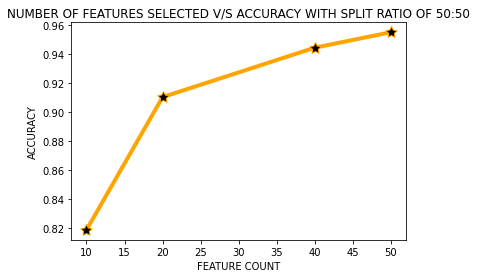

In [ ]:

#On train:test ratio of 50:50
plt.plot(featureList[0:4],listPref[0:4],color='orange',linewidth=4,
         marker=(5,1),markerfacecolor='black',markersize=12)
plt.xlabel("FEATURE COUNT")
plt.ylabel("ACCURACY")
plt.title("NUMBER OF FEATURES SELECTED V/S ACCURACY WITH SPLIT RATIO OF 50:50")
plt.show()

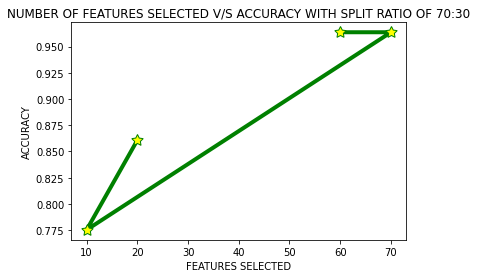

In [ ]:
#On train:test ratio of 70:30
plt.plot(featureList[4:8],listPref[4:8],color='green',linewidth=4,
         marker=(5,1),markerfacecolor='yellow',markersize=12)
plt.xlabel("FEATURES SELECTED")
plt.ylabel("ACCURACY")
plt.title("NUMBER OF FEATURES SELECTED V/S ACCURACY WITH SPLIT RATIO OF 70:30")
plt.show()

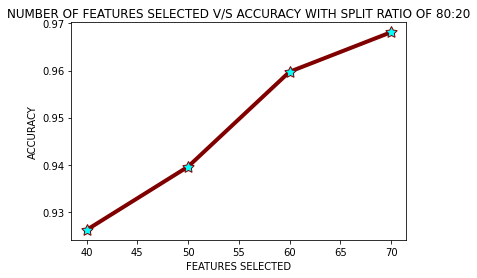

In [ ]:

#On train:test ratio of 80:20
plt.plot(featureList[8:12],listPref[8:12],color='maroon',linewidth=4,
         marker=(5,1),markerfacecolor='cyan',markersize=12)
plt.xlabel("FEATURES SELECTED")
plt.ylabel("ACCURACY")
plt.title("NUMBER OF FEATURES SELECTED V/S ACCURACY WITH SPLIT RATIO OF 80:20")
plt.show()

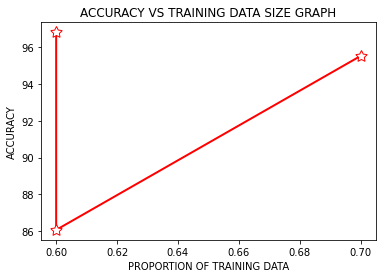

In [ ]:

plt.plot([listTrainSize[3],listTrainSize[7],listTrainSize[11]],[listPref[3]*100,listPref[7]*100,listPref[11]*100],
         color='red',linewidth=2,
         marker=(5,1),markerfacecolor='white',markersize=12)
plt.xlabel("PROPORTION OF TRAINING DATA")
plt.ylabel("ACCURACY")
plt.title("ACCURACY VS TRAINING DATA SIZE GRAPH")
plt.show()